# Exploratory Data Analysis

Dataset: [Semantic Similarity Predictions for Phrases in U.S. Patents](https://www.kaggle.com/competitions/us-patent-phrase-to-phrase-matching)

The goal of the dataset is to predict the semantic similarity score ($s \in [0.00, 0.25, 0.50, 0.75, 1.00]$) between an anchor phrase and a target phrase, with 0 being completely unrelated and 1 being closely related.

### Load & Query Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
df_titles = pd.read_csv('./data/titles.csv')

In [44]:
display(df_train.sample(3, random_state=1))
display(df_test.sample(3, random_state=1))
display(df_titles.sample(3, random_state=1))

print('df_train size: {0}'.format(df_train.shape))
print('df_train size: {0}'.format(df_test.shape))
print('df_train size: {0}'.format(df_titles.shape))

,id,anchor,target,context,score
19561,852a5e80877ad33e,materially less,slightly inner,F22,0.25
19445,ada2003ddbc86c0d,material formation,formation material,H01,1.00
15988,c006e63dc2756ac2,idle mixture,idle compiler,F02,0.00


,id,anchor,target,context
30,8247ff562ca185cc,polls,pooling device,B21
34,79795133c30ef097,different conductivity,carrier polarity,H03
28,26c3c6dc6174b589,seal teeth,teeth whitening,F01


,code,title,section,class,subclass,group,main_group
135778,E05B65/1073,{the pivot axis being substantially pependicul...,E,5.0,B,65.0,1073.0
237145,H04M2201/08,Magnetic elements,H,4.0,M,2201.0,8.0
39753,B21C47/06,"with loaded rollers, bolts, or equivalent mean...",B,21.0,C,47.0,6.0


df_train size: (36473, 5)
df_train size: (36, 4)
df_train size: (260476, 7)


In [92]:
df_train.isna().sum()

id                      0
anchor                  0
target                  0
context                 0
score                   0
title                   0
anchor_length           0
target_length           0
unique_anchor_length    0
unique_target_length    0
dtype: int64

In [45]:
for x in np.linspace(0, 1, 5):
    display(df_train[df_train.score == x].sample(3, random_state=1))

,id,anchor,target,context,score
4770,bf3fdc2e4b7cd659,cathode layer,outer layer,G01,0.0
2447,0795416ddc8d3926,average impact,average scores,G01,0.0
36230,314c9dcbdb2fa01d,well pump,learning,E21,0.0


,id,anchor,target,context,score
3322,51ab3848d188240d,beam traveling direction,symmetric directions,H05,0.25
28056,43dea5736cbaa211,return structure,spring,B62,0.25
16398,5103229625de2294,include retaining elements,teeth,A45,0.25


,id,anchor,target,context,score
4370,84c51476f19c79d2,carpet tiles,carpet mats,B41,0.5
18534,cf799ca49666b684,liquid reservoirs,liquid contained systems,F01,0.5
26847,effca15bd79b308b,radio wave transmission,radio wave,B29,0.5


,id,anchor,target,context,score
19290,b24c5ef62e981481,map display system,navigation setting system,G09,0.75
29204,98e0b18b246ece36,scorch,grilling heat,C08,0.75
16297,9e80acf4094d38bd,implement with plurality,perform with plurality,A01,0.75


,id,anchor,target,context,score
35185,d6942ff7d9bddbcf,video lines,video signal line,G09,1.0
14696,a2d8462b917011bb,glass part,glass parts,G04,1.0
19355,8401a36afab2f2e1,mat sections,mat section,A63,1.0


In [46]:
# Add context codes to df_train
df_train['title'] = df_train['context'].map(lambda x: df_titles[df_titles.code == x]['title'])

In [47]:
# Calculate phrase lengths
df_train['anchor_length'] = df_train['anchor'].apply(lambda x: len(x.split(' ')))
df_train['target_length'] = df_train['target'].apply(lambda x: len(x.split(' ')))

df_train['unique_anchor_length'] = df_train['anchor'].apply(lambda x: len(set(x.split(' '))))
df_train['unique_target_length'] = df_train['target'].apply(lambda x: len(set(x.split(' '))))

In [96]:
test = set([1, 2, 3])
test2 = set([1, 2, 3, 4, 5, 6, 7])

len(test.intersection(test2))

3

In [116]:

def calculate_intersection(arr):
    anchor_set = set(arr[0].split(' '))
    target_set = set(arr[1].split(' '))
    return len(anchor_set.intersection(target_set))

# Calculate similar words
df_train['common_words'] = df_train[['anchor', 'target']].apply(lambda x: calculate_intersection(x), axis=1)

In [117]:
df_train

,id,anchor,target,context,score,title,anchor_length,target_length,unique_anchor_length,unique_target_length,common_words
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,9022 FURNITURE; DOMESTIC ARTICLES OR APPLIA...,1,3,1,3,1
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,9022 FURNITURE; DOMESTIC ARTICLES OR APPLIA...,1,3,1,3,0
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,9022 FURNITURE; DOMESTIC ARTICLES OR APPLIA...,1,2,1,2,0
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,9022 FURNITURE; DOMESTIC ARTICLES OR APPLIA...,1,2,1,2,0
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,9022 FURNITURE; DOMESTIC ARTICLES OR APPLIA...,1,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00,"61546 DECORATIVE ARTS Name: title, dtype: o...",2,2,2,2,1
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50,"61546 DECORATIVE ARTS Name: title, dtype: o...",2,2,2,2,0
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50,"61546 DECORATIVE ARTS Name: title, dtype: o...",2,2,2,2,0
36471,756ec035e694722b,wood article,wooden material,B44,0.75,"61546 DECORATIVE ARTS Name: title, dtype: o...",2,2,2,2,0


### Summary Statistics

In [40]:
# Number of unique context codes
print('# of Unique Context Codes: %i' % len(df_train['context'].unique()))

# of Unique Context Codes: 106


In [38]:
# Number of unique phrases
print('# of Unique Anchor Phrases: %i' % len(df_train['anchor'].unique()))
print('# of Unique Target Phrases: %i' % len(df_train['target'].unique()))

# of Unique Anchor Phrases: 733
# of Unique Target Phrases: 29340


In [29]:
# Number of unique words
anchor_concat = ' '.join(df_train['anchor'])
target_concat = ' '.join(df_train['target'])

print('# of Unique Anchor Words: %i' % len(set(anchor_concat.split(' '))))
print('# of Unique Target Words: %i' % len(set(target_concat.split(' '))))

# of Unique Anchor Words: 1113
# of Unique Target Words: 8906


In [138]:
# Summary of phrase lengths
df_train[['anchor_length', 'target_length', 'unique_anchor_length', 'unique_target_length', 'common_words']].describe()

,anchor_length,target_length,unique_anchor_length,unique_target_length,common_words
count,36473.000000,36473.000000,36473.000000,36473.000000,36473.000000
mean,2.177885,2.171195,2.177885,2.169111,0.637458
std,0.641176,0.849613,0.641176,0.844400,0.735560
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000
50%,2.000000,2.000000,2.000000,2.000000,0.000000
75%,2.000000,3.000000,2.000000,3.000000,1.000000
max,5.000000,15.000000,5.000000,13.000000,5.000000


In [139]:
df_train['common_words'].value_counts()

0    18275
1    13688
2     4022
3      438
4       46
5        4
Name: common_words, dtype: int64

### Plots

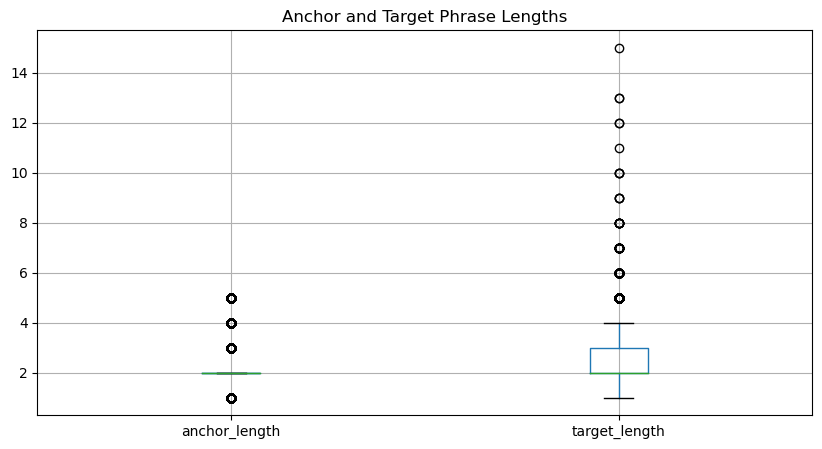

In [88]:
df_train[['anchor_length', 'target_length']].boxplot(figsize=(10, 5))
ax = plt.gca()
ax.set_title('Anchor and Target Phrase Lengths');

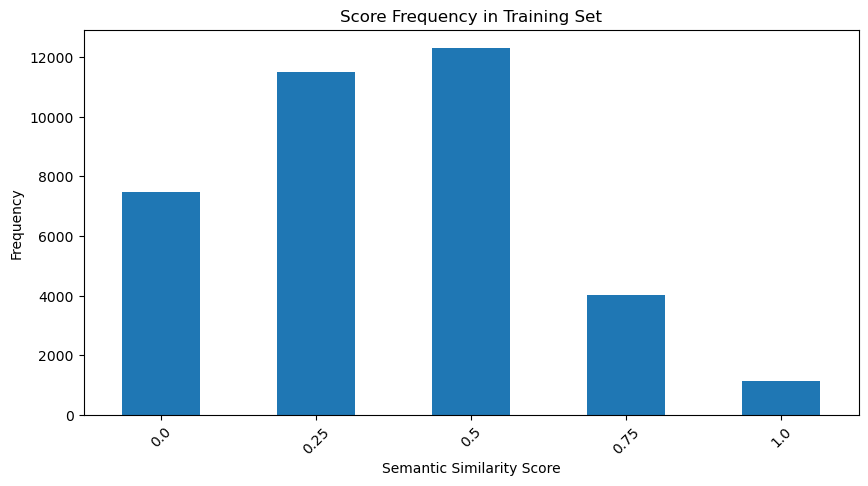

In [69]:
df_train['score'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5), rot=45)
ax = plt.gca()
ax.set_title('Score Frequency in Training Set');
ax.set_xlabel('Semantic Similarity Score');
ax.set_ylabel('Frequency');

Text(0, 0.5, '# of Common Words')

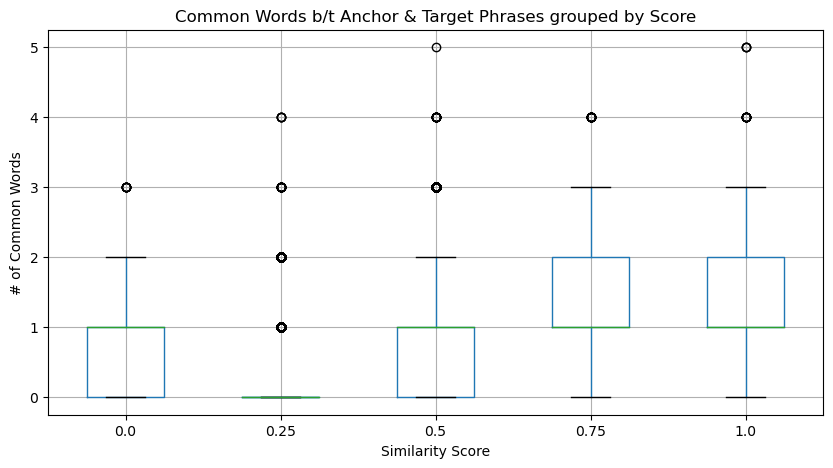

In [135]:
df_train[['common_words', 'score']].groupby('score').boxplot(subplots=False, column='common_words', figsize=(10, 5));
ax = plt.gca()
ax.set_xticklabels(np.linspace(0, 1, 5))
ax.set_title('Common Words b/t Anchor & Target Phrases grouped by Score');
ax.set_xlabel('Similarity Score');
ax.set_ylabel('# of Common Words')

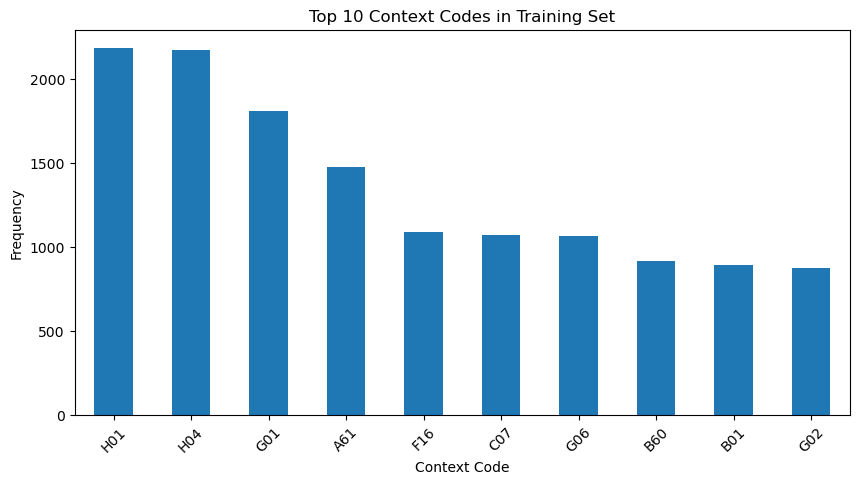

In [72]:
srs = df_train['context'].value_counts().sort_values(ascending=False)[:10]
srs.plot(kind='bar', figsize=(10, 5), rot=45)
ax = plt.gca()
ax.set_title('Top 10 Context Codes in Training Set');
ax.set_xlabel('Context Code');
ax.set_ylabel('Frequency');

In [87]:
for code in srs.index:
    print('{0}: {1}'.format(code, df_titles.loc[df_titles.code == code, 'title'].item()))

H01: BASIC ELECTRIC ELEMENTS
H04: ELECTRIC COMMUNICATION TECHNIQUE
G01: MEASURING; TESTING
A61: MEDICAL OR VETERINARY SCIENCE; HYGIENE
F16: ENGINEERING ELEMENTS AND UNITS; GENERAL MEASURES FOR PRODUCING AND MAINTAINING EFFECTIVE FUNCTIONING OF MACHINES OR INSTALLATIONS; THERMAL INSULATION IN GENERAL
C07: ORGANIC CHEMISTRY
G06: COMPUTING; CALCULATING; COUNTING
B60: VEHICLES IN GENERAL
B01: PHYSICAL OR CHEMICAL PROCESSES OR APPARATUS IN GENERAL
G02: OPTICS


__Observations__

* The phrases themselves are relatively short (2 +/- 1 words)

* Target phrases have much more variety; ~9K unique words, with most target phrases being unique in the entire training dataset (~29K/36K are unique phrases)

* Anchor phrases seem more like 'categories'; repeated much more often (~700 unique phrases) and contain fewer unique words (~1K)

* Majority of phrase pairs do not have any words in common. 

* Phrase pairs with words in common tend to have, on average, a higher similarity score, though there exist contradictions to this generalization (e.g. phrase pairs with alot of words in common but low similarity score).

* Dataset spans many professions; 106 patent classification codes present

* Dataset is skewed toward phrase pairs that are unsimilar (e.g. low similarity scores)